<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%209/SVM_Regression_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Memunculkan dialog unggah file
uploaded = files.upload()

# Mengecek file yang diunggah
print(uploaded.keys())


Saving CreditDataset.csv to CreditDataset.csv
dict_keys(['CreditDataset.csv'])


In [7]:
import pandas as pd

# Membaca file (ganti "CreditDataset.csv" dengan nama file Anda)
data = pd.read_csv("CreditDataset.csv")
print(data.head())

# Melihat informasi umum tentang dataset
print(data.info())  # Memeriksa tipe data, jumlah missing values, dll.

# Deskripsi statistik data
print(data.describe())  # Informasi ringkasan data numerik


    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 

In [4]:
# Import libraries dasar
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi dataset

# Import libraries untuk preprocessing dan evaluasi
from sklearn.model_selection import train_test_split  # Membagi dataset
from sklearn.preprocessing import StandardScaler  # Normalisasi fitur

# Import libraries untuk SVM Regression dan evaluasi
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluasi regresi

# Import untuk visualisasi
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Untuk visualisasi data


In [11]:
# Melihat tipe data setiap kolom
print(data.dtypes)


x1       object
x2        int64
x3       object
x4       object
x5        int64
x6       object
x7       object
x8        int64
x9       object
x10      object
x11       int64
x12      object
x13       int64
x14      object
x15      object
x16       int64
x17      object
x18       int64
x19      object
x20      object
Class     int64
dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk semua kolom bertipe object
labelencoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = labelencoder.fit_transform(data[col])

# Lihat data setelah encoding
print(data.head())


   x1  x2  x3  x4    x5  x6  x7  x8  x9  x10  ...  x12  x13  x14  x15  x16  \
0   0   6   4   4  1169   4   4   4   2    0  ...    0   67    2    1    2   
1   1  48   2   4  5951   0   2   2   1    0  ...    0   22    2    1    1   
2   3  12   4   7  2096   0   3   2   2    0  ...    0   49    2    1    1   
3   0  42   2   3  7882   0   3   2   2    2  ...    1   45    2    2    1   
4   0  24   3   0  4870   0   2   3   2    0  ...    3   53    2    2    2   

   x17  x18  x19  x20  Class  
0    2    1    1    0      1  
1    2    1    0    0      2  
2    1    2    0    0      1  
3    2    2    0    0      1  
4    2    2    0    0      2  

[5 rows x 21 columns]


**Preprocessing Dataset**

In [13]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Class'])  # Kolom target adalah 'Class'
y = data['Class']

# Membagi dataset menjadi data latih dan uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data numerik menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Transformasi data latih
X_test_scaled = scaler.transform(X_test)  # Transformasi data uji


**Membangun dan Melatih Model SVM Regression**


*   Support Vector Machine (SVM) adalah algoritma yang dapat digunakan untuk tugas regresi dan klasifikasi. Dalam regresi, tujuan SVM adalah memprediksi nilai target kontinu dengan meminimalkan kesalahan dan memaksimalkan margin antara data dan hyperplane.





In [14]:
# Inisialisasi model SVM Regression
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Kernel rbf (default), parameter C dan epsilon dapat dituning

# Melatih model dengan data latih
svm_regressor.fit(X_train_scaled, y_train)

# Prediksi nilai target pada data uji
y_pred = svm_regressor.predict(X_test_scaled)


**Evaluasi Model Regresi**
> Evaluasi model regresi dilakukan untuk menilai seberapa baik model memprediksi nilai target. Beberapa metrik evaluasi yang digunakan untuk regresi:


*   Mean Absolute Error (MAE): Rata-rata nilai absolut dari kesalahan prediksi.
*   Mean Squared Error (MSE): Rata-rata kesalahan kuadrat (lebih sensitif terhadap outlier).
*   R-squared (R²): Proporsi variansi dalam data yang dapat dijelaskan oleh model.






In [15]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-Squared (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R2 Score): {r2}")


Mean Squared Error (MSE): 0.15492406296958738
Mean Absolute Error (MAE): 0.29526627281853157
R-Squared (R2 Score): 0.2550832409203636


**Eksplorasi Matriks Evaluasi Tambahan (ROC dan AUC)**


*   ROC (Receiver Operating Characteristic) dan AUC (Area Under Curve) umumnya digunakan untuk klasifikasi, tetapi dapat diterapkan pada regresi jika target diubah menjadi masalah klasifikasi (binary/multiclass).
*   Dalam regresi, jika prediksi dinilai sebagai "benar" atau "salah" berdasarkan threshold tertentu, ROC dan AUC membantu menilai kemampuan model untuk memisahkan kelas.



ROC AUC Score: 0.7268902512321193


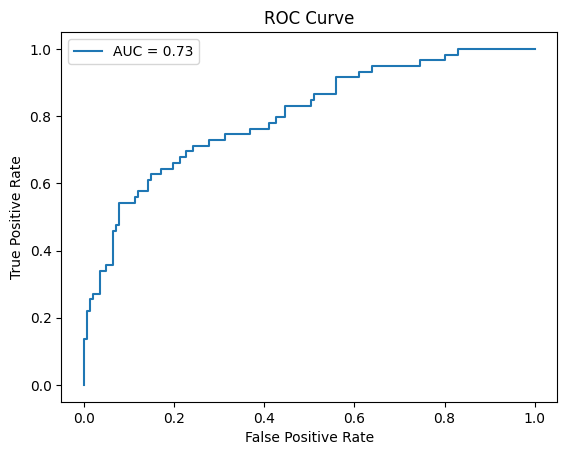

In [16]:
# Binarisasi target untuk evaluasi ROC dan AUC (opsional jika target cocok)
from sklearn.metrics import roc_auc_score, roc_curve

# Binarisasi target jika diperlukan
y_binary_test = (y_test > y_test.mean()).astype(int)  # Binarisasi berdasarkan mean
y_binary_pred = (y_pred > y_test.mean()).astype(int)  # Prediksi biner berdasarkan mean

# ROC AUC Score
roc_auc = roc_auc_score(y_binary_test, y_binary_pred)
print(f"ROC AUC Score: {roc_auc}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_binary_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Visualisasi Hasil Prediksi vs Nilai Sebenarnya**


> Visualisasi prediksi vs nilai sebenarnya membantu memahami seberapa dekat prediksi model dengan nilai target. Visualisasi seperti scatter plot atau garis ideal (y = x) sering digunakan.



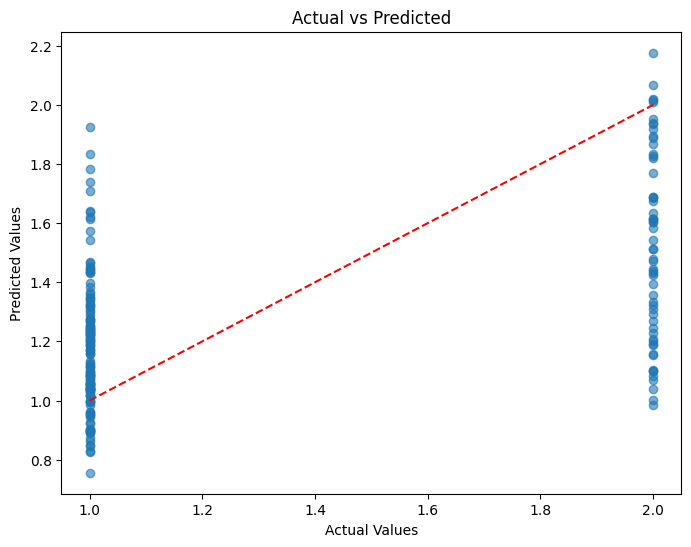

In [17]:
# Scatter plot antara nilai sebenarnya vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis ideal
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


**Tuning Hypermeter dengan GridSearchCV**


*   GridSearchCV adalah metode untuk mencari kombinasi hyperparameter terbaik dengan melakukan cross-validation.
*   Hyperparameter seperti C, epsilon, dan kernel dapat disesuaikan untuk meningkatkan performa model.



In [18]:
from sklearn.model_selection import GridSearchCV

# Menentukan grid parameter
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid Search dengan Cross Validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Output hasil terbaik
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01